In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from fedlearnerV2 import client, federatedModel

2023-06-14 17:48:42.318660: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 17:48:43.551738: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda-11.8/lib64
2023-06-14 17:48:43.551795: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda-11.8/lib64
2023-06-14 17:48:43.551801: W 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import os
import cv2
from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
# In[2]:


client1= client("192.168.0.198", "keytotal")
client2= client("192.168.0.219", "keytotal")

In [22]:
os.chdir('/home/jmora/Documentos/TFM/FedAL/code/local')
maindir='/home/jmora/Documentos/TFM/FedAL/code/local/set2'
os.chdir('./set2')
l=[]
for i in os.listdir():
    try:
        os.chdir(i)
        name=os.getcwd().split("/")
        num=int(name[len(name)-1])
        for j in os.listdir():
            img=cv2.imread(j)
            img=cv2.resize(img,(224,224))
            l.append([img, num])
        os.chdir(maindir)
    except:
        continue
train=shuffle(l)
x_train=[]
y_train=[]
for i in train:
    x_train.append(i[0])
    y_train.append([i[1]])
x_train= np.array(x_train)
y_train= np.array(y_train)  
test = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(1)
os.chdir('../')


In [4]:
def get_VGG16(filters):
    model = Sequential()

    # Block 1
    model.add(Conv2D(filters, (3, 3), activation='elu', padding='same', input_shape=(224, 224, 3)))
    model.add(Conv2D(filters, (3, 3), activation='elu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(BatchNormalization())

    # Block 2
    model.add(Conv2D(2*filters, (3, 3), activation='elu', padding='same'))
    model.add(Conv2D(2*filters, (3, 3), activation='elu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(BatchNormalization())

    # Block 3
    model.add(Conv2D(4*filters, (3, 3), activation='elu', padding='same'))
    model.add(Conv2D(4*filters, (3, 3), activation='elu', padding='same'))
    model.add(Conv2D(4*filters, (3, 3), activation='elu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(BatchNormalization())

    # Block 4
    model.add(Conv2D(8*filters, (3, 3), activation='elu', padding='same'))
    model.add(Conv2D(8*filters, (3, 3), activation='elu', padding='same'))
    model.add(Conv2D(8*filters, (3, 3), activation='elu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(BatchNormalization())

    # Block 5
    model.add(Conv2D(16*filters, (3, 3), activation='elu', padding='same'))
    model.add(Conv2D(16*filters, (3, 3), activation='elu', padding='same'))
    model.add(Conv2D(16*filters, (3, 3), activation='elu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32*filters, (3, 3), activation='elu', padding='same'))
    model.add(Conv2D(32*filters, (3, 3), activation='elu', padding='same'))
    model.add(Conv2D(32*filters, (3, 3), activation='elu', padding='same'))
    model.add(Conv2D(32*filters, (3, 3), activation='elu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    

    
    
    
    model.add(Flatten())


    model.add(Dense(256,
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dropout(0.5))
    model.add(Dense(128,
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dropout(0.5))
    
    
    model.add(Dense(64,
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)))
    model.add(BatchNormalization())
    model.add(Activation('elu'))

    model.add(Dropout(0.5))
    model.add(Dense(32,
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss=keras.losses.BinaryCrossentropy(),
            optimizer=keras.optimizers.Adam(learning_rate= 1e-07,beta_2=0.999, epsilon=1e-8, amsgrad=True, clipnorm=1.0, clipvalue=0.5),
            metrics=['accuracy', tf.keras.metrics.Recall()])



    return model

In [5]:
def get_DenseNet():
    conv = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=max,
    classifier_activation="softmax",
    )
    model=Sequential()
    model.add(conv)

    model.add(BatchNormalization())


    
    
    
    model.add(Flatten())


    model.add(Dense(128,
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dropout(0.5))
    
    
    model.add(Dense(64,
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)))
    model.add(BatchNormalization())
    model.add(Activation('elu'))

    model.add(Dropout(0.5))
    model.add(Dense(32,
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss=keras.losses.BinaryCrossentropy(),
            optimizer=keras.optimizers.Adam(learning_rate= 1e-07,beta_2=0.999, epsilon=1e-8, amsgrad=True, clipnorm=1.0, clipvalue=0.5),
            metrics=['accuracy', tf.keras.metrics.Recall()])
    
    return model


In [6]:
model=get_VGG16(10)

#model=get_DenseNet()
dbparams='./db_parameters.json'

# In[10]:
print('okay let\'s go')

fedmod=federatedModel(model, 32, [client1, client2], dbparams, 10000, test_set=test)


# In[ ]:





okay let's go


In [ ]:

fedmod.fit()


In [16]:
model1=keras.models.load_model('./bestmodel-batchfed')

In [ ]:
fedmod.set_lr(1e-6)
fedmod.fit()

In [17]:
 model1.evaluate(test)

200/200 [==============================] - 1s 3ms/step - loss: 0.4839 - accuracy: 0.9500 - recall: 0.9800


[0.48393359780311584, 0.949999988079071, 0.9800000190734863]

In [19]:
os.chdir('/home/jmora/Documentos/TFM/FedAL/code/local')
maindir='/home/jmora/Documentos/TFM/FedAL/code/local/ALL_IDB_VALSET'
os.chdir('./set2')
l=[]
for i in os.listdir():

        os.chdir(i)
        name=os.getcwd().split("/")
        num=int(name[len(name)-1])
        for j in os.listdir():
            img=cv2.imread(j)
            img=cv2.resize(img,(224,224))
            l.append([img, num])
        os.chdir(maindir)
    except:
        continue
train=shuffle(l)
x_train=[]
y_train=[]
for i in train:
    x_train.append(i[0])
    y_train.append([i[1]])
x_train= np.array(x_train)
y_train= np.array(y_train)  
ALL_test = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(1)
os.chdir('../')

In [23]:
from sklearn.metrics import confusion_matrix

#Predict
y_prediction = model1.predict(x_train)


#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_train, y_prediction.round())


7/7 [==============================] - 0s 10ms/step


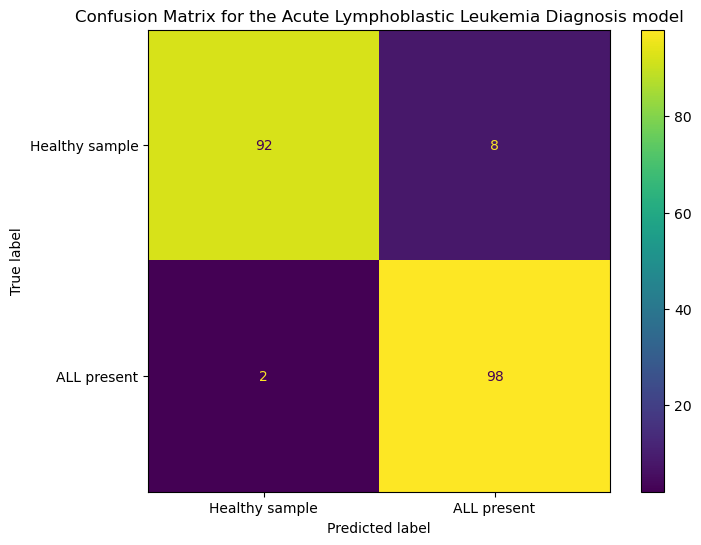

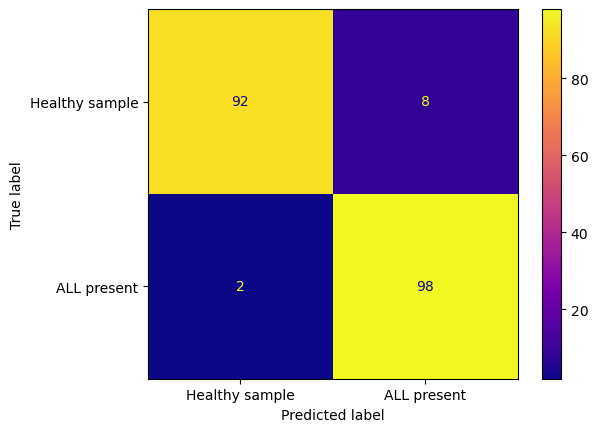

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay.from_predictions(y_train, y_prediction.round(), display_labels=["Healthy sample","ALL present"], cmap='plasma')

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Acute Lymphoblastic Leukemia Diagnosis model')
display.plot(ax=ax);

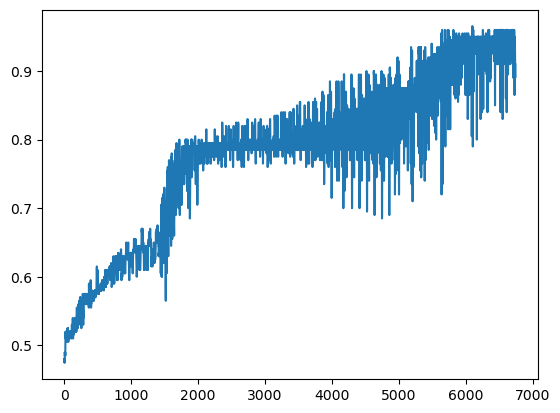

In [9]:
from matplotlib import pyplot as plt


acchist=fedmod.acchistory
plt.plot(acchist)

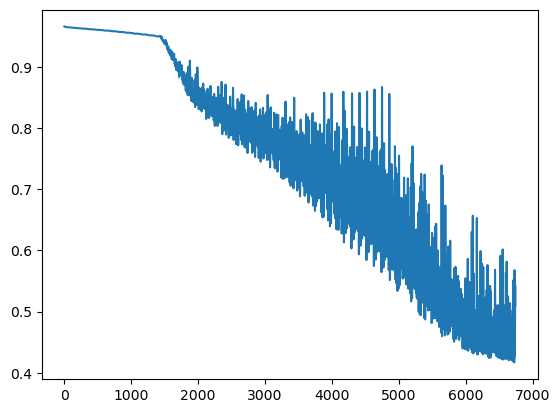

In [10]:
plt.plot(fedmod.losshistory)

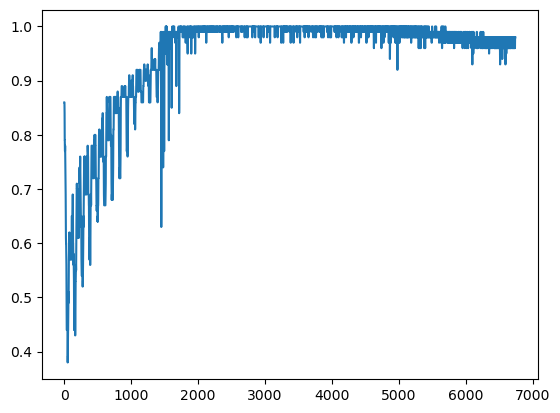

In [11]:
plt.plot(fedmod.recallhistory)

In [ ]:
model=keras.models.load_model('./bestmodeldeep')

In [ ]:
from sklearn.metrics import confusion_matrix

#Predict
y_prediction = model.predict(x_train)


#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_train, y_prediction.round())


In [ ]:
result

In [ ]:
len(x_train)

In [ ]:
model.evaluate(ALL_test)

In [ ]:
os.chdir('/home/jmora/Documentos/TFM/FedAL/code/local')
maindir='/home/jmora/Documentos/TFM/FedAL/code/local/Trainset'
os.chdir('./set2')
l=[]
for i in os.listdir():
    try:
        os.chdir(i)
        name=os.getcwd().split("/")
        num=int(name[len(name)-1])
        for j in os.listdir():
            img=cv2.imread(j)
            img=cv2.resize(img,(224,224))
            l.append([img, num])
        os.chdir(maindir)
    except:
        continue
train=shuffle(l)
x_train=[]
y_train=[]
for i in train:
    x_train.append(i[0])
    y_train.append([i[1]])
x_train= np.array(x_train)
y_train= np.array(y_train)  
local_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(1)
os.chdir('../')

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback =TensorBoard(log_dir="./logdir", histogram_freq=1)
callbacks=[]
callbacks.append(tensorboard_callback)
modelocal=get_VGG16(10)
modelocal.fit(local_train, validation_data=test, callbacks=callbacks, epochs=1000)